In [9]:
#Setup
from qiskit import QuantumCircuit
from dotenv import load_dotenv
import os
from qiskit_ibm_provider import IBMProvider
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.visualization import plot_histogram



load_dotenv()
key = os.getenv("IMBQ_KEY")
provider = IBMProvider()

Exercise 4 -> Call the circuit from the previous exercise into a real quantum computer

In [10]:
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)
qc.measure_all()

print(qc.draw())

        ┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 


In [11]:
service = QiskitRuntimeService(channel="ibm_quantum", token=key)
#Select a real quantum computer (we want a computer with the fewest processes in progress)
quantum_computer = service.least_busy(simulator=True, operational=True)
#Optimise circuit to be run on quantum computer
pm = generate_preset_pass_manager(backend=quantum_computer, optimization_level=0)
optimised_circuit = pm.run(qc)
#Launch the job
result = quantum_computer.run(optimised_circuit, shots=500).result()
data = result.get_counts(0)

total = sum(data.values())
data = {key: value/total for key, value in data.items()}

print(data)

{'11': 0.49, '00': 0.51}


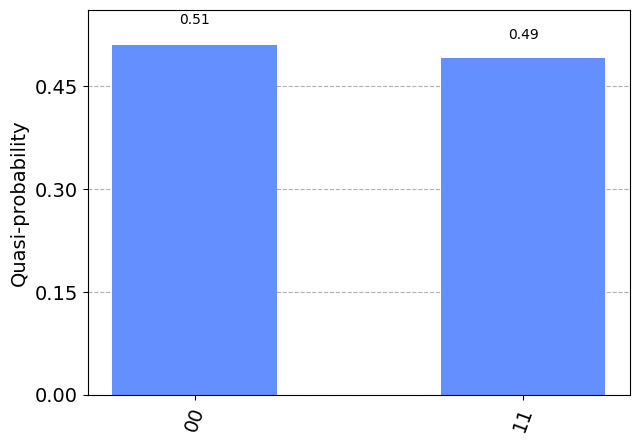

In [12]:
plot_histogram([data])

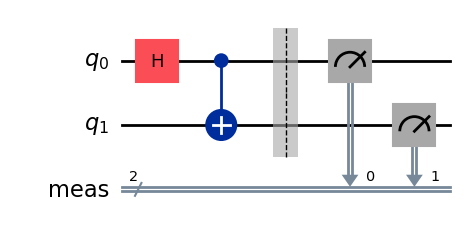

In [13]:
qc.draw('mpl')